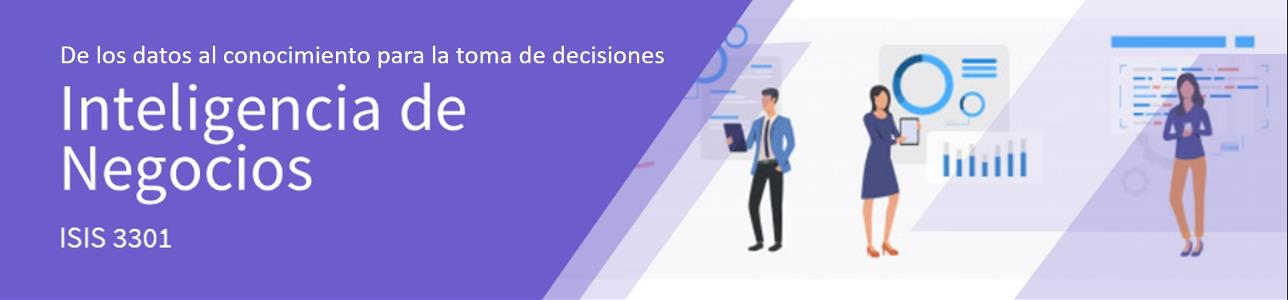

## Objetivos

*   Analizar conjuntos de datos no estructurados.
*   Aplicar diferentes técnicas de pre-procesamiento de textos.



## Problema
<p style="text-align: justify;"> En esta etapa desempeñan principalmente el rol de científico de datos. Cada grupo debe trabajar con reseñas de sitios turísticos y calificaciones dadas a los mismos para construir un modelo analítico que permita realizar la calificación automática de nuevas reseñas, con un alto nivel de precisión y de sensibilidad (recall). De igual manera, deben describir las palabras seleccionadas para representar las reseñas, las cuales corresponden a las variables a utilizar en el modelo analítico.

### Objetivos
• Automatizar el proceso de calificación de reseñas de sitios turísticos.
• Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.
• Planear la interacción con un grupo interdisciplinario para identificar usuarios y posibles herramientas a desarrollar que faciliten la interacción del resultado del modelo analítico desarrollado.

### Criterios de éxito

•Alta precisión y sensibilidad en la calificación automática de nuevas reseñas.
•Validación y mejora continua del modelo analítico y la aplicación desarrollada.
•Desarrollo de una aplicación útil y eficiente para la organización y sus stakeholders.

El hecho de realizar este proyecto de forma satisfactoria puede generar un impacto significativo en el sector del turismo colombiano, principalmente en todos aquellos negocios como hoteles y restaurantes de estas zonas, con altos números de visitantes turistas, podrán identificar áreas de mejora y desarrollar estrategias para aumentar la popularidad de los destinos turísticos. con esto se benefician tanto los negocios, como la experiencia del turista.

### Enfoque Analítico
El método analítico propuesto emplea avanzadas herramientas de procesamiento de lenguaje natural y aprendizaje automático para crear un sistema que simplifique la evaluación de opiniones sobre destinos turísticos. Con esta estrategia, las empresas del sector turismo podrán analizar de manera eficaz y precisa las reseñas de sus clientes, detectar patrones y áreas de mejora, y tomar decisiones informadas para mejorar la experiencia del turista
Al utilizar algoritmos de análisis de sentimientos y modelos de clasificación, se logrará categorizar automáticamente las reseñas según su tono emocional y prever la calificación asociada, lo que facilitará la identificación de aspectos específicos que influyen positiva o negativamente en la percepción.


### 1. Instalación e importanción de librerías.


In [ ]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions
!pip install langdetect

In [ ]:
!{sys.executable} -m pip install pydantic==1.8.2

In [ ]:
# Manejo de gráficas
!pip install scikit-plot

!pip install pandas==2.0.0

!pip install setuptools wheel

!pip install spacy


In [ ]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

In [ ]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')

In [ ]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

In [ ]:
!pip install inflect
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
import joblib
import inflect
!{sys.executable} -m pip install pandas-profiling
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download es_core_news_lg
import es_core_news_lg
import re, string, unicodedata
from sklearn.linear_model import LinearRegression
import spacy
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, SnowballStemmer
from sklearn.preprocessing import FunctionTransformer
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from langdetect import detect
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

import matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos.

In [ ]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('tipo1_entrenamiento_estudiantes.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_t=data.copy()
data_t = data_t.reset_index(drop = True)


In [ ]:
data_t

,Review,Class
0,Nos alojamos en una casa alquilada en la ciuda...,4
1,"La comida está bien, pero nada especial. Yo te...",3
2,"En mi opinión, no es una como muchos usuarios ...",3
3,esta curiosa forma que asemeja una silla de mo...,4
4,Lo mejor era la limonada. Me gusto la comida d...,2
...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3
7871,Es difícil revisar el castillo porque apenas p...,3
7872,Si vas a Mérida no puedes perderte de este lug...,5
7873,"Este imperdible sitio, que lleva el nombre del...",5


In [ ]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


#### Entendimiento de los Datos

Para entender los mensajes, se realizan 'estadísticas descriptivas' para poder obtener un análisis de los textos.

In [ ]:
from scipy import stats as st

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]
#textos['Moda'] =
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
#ProfileReport(textos)

In [ ]:
textos

,Review,Class,Conteo,Max,Min
0,Nos alojamos en una casa alquilada en la ciuda...,4,416,13,1
1,"La comida está bien, pero nada especial. Yo te...",3,263,14,1
2,"En mi opinión, no es una como muchos usuarios ...",3,612,16,1
3,esta curiosa forma que asemeja una silla de mo...,4,180,9,2
4,Lo mejor era la limonada. Me gusto la comida d...,2,88,9,1
...,...,...,...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3,624,13,0
7871,Es difícil revisar el castillo porque apenas p...,3,609,15,1
7872,Si vas a Mérida no puedes perderte de este lug...,5,168,9,1
7873,"Este imperdible sitio, que lleva el nombre del...",5,424,18,0


Con esto y apoyándonos en el enunciado brindado logramos comprender que trabajaríamos con datos que consisten en reseñas y sus respectivas calificaciones de diferentes cadenas hoteleras y hoteles distribuidos por el país.

Teniendo esto en cuenta nuestro siguiente paso fue la preparación de los datos para lo que implementamos las diferentes prácticas vistas a lo largo del curso como lo son la limpieza de los datos, la tokenización y la normalización.


### Reconocimiento de los lenguajes del dataframe
Vamos a utilizar la librería langdetect para poder tener en cuenta los diferentes lenguajes presentes en las reviews; con esto buscamos poder tener una mejor transformación de la información y su vez poder entrenar un modelo de mayor confiabilidad para el negocio.

In [ ]:
def detect_language(review):
  try:
    return detect(review)
  except:
    return None

data_t['Idioma'] = data_t['Review'].apply(detect_language)

In [ ]:
conteo_idiomas = data_t['Idioma'].value_counts()
print("Conteo de filas por idioma")
print(conteo_idiomas)

Conteo de filas por idioma
Idioma
es    7870
en       4
pt       1
Name: count, dtype: int64


Con esto podemos entender que tenemos 7868 reviews en español, 5 en inglés y 2 en portugués.

Como las reviews en inglés y en portugués identificadas son datos atípicos entre los otros datos que están en español, y que aparte no suponen una gran cantidad de los datos, entonces vamos a tomar la decisión de eliminarlos para que no hagan ruido en el modelo:

In [ ]:
# Filtra las filas donde el idioma es español
data_t = data_t[data_t['Idioma'] == 'es']




In [ ]:
conteo_idiomas = data_t['Idioma'].value_counts()
print("Conteo de filas por idioma")
print(conteo_idiomas)

Conteo de filas por idioma
Idioma
es    7870
Name: count, dtype: int64


### 3. Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.


#### **3.1 Limpieza de los datos**
Este proceso se realizó con el objetivo de dejar el archivo en texto plano, eliminar caracteres especiales y pasar todo a minúscula, cabe aclarar que de igual manera se realizó un proceso de corrección de las contracciones presentes en los textos como prerrequisito del siguiente paso. A continuación podemos observar los resultados obtenidos de este procesamiento.


In [ ]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, language='es'):
        self.language = language

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_processed = X.apply(self._preprocess_text)
        return X_processed

    def _preprocess_text(self, text):
        # Aplicar pasos de preprocesamiento
        text = self._remove_non_ascii(text)
        text = self._to_lowercase(text)
        text = self._replace_numbers(text)
        text = self._remove_punctuation(text)
        if self.language == 'es':
            text = self._remove_stopwords(text)
        return text

    def _remove_non_ascii(self, text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    def _to_lowercase(self, text):
        return text.lower()

    def _replace_numbers(self, text):
        p = inflect.engine()
        words = text.split()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return ' '.join(new_words)

    def _remove_punctuation(self, text):
        return re.sub(r'[^\w\s]', '', text)

    def _remove_stopwords(self, text):
        stop_words = set(stopwords.words('spanish'))
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)


In [ ]:
# Crear una instancia de TextPreprocessor
preprocessor = TextPreprocessor(language='es')

# Aplicar el preprocesamiento a la columna 'Review' usando la instancia de TextPreprocessor
data_t['words'] = preprocessor.transform(data_t['Review'])


<ipython-input-41-f1111f2a2302>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t['words'] = preprocessor.transform(data_t['Review'])


In [ ]:
data_t

,Review,Class,Idioma,words,words_united
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,alojamos casa alquilada ciudad amurallada pare...,aloj cas alquil ciud amurall pareci tanto segu...
1,"La comida está bien, pero nada especial. Yo te...",3,es,comida bien especial tenia mejor comida mexcan...,com bien especial teni mejor com mexc unid mar...
2,"En mi opinión, no es una como muchos usuarios ...",3,es,opinion usuarios reclaman gran paladar parece ...,opinion usuari reclam gran palad parec ser par...
3,esta curiosa forma que asemeja una silla de mo...,4,es,curiosa forma asemeja silla montar ahi nombre ...,curio form asemej sill mont ahi nombr icon ciu...
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,mejor limonada gusto comida mundo sosa frio,mejor limon gust com mund sos fri
...,...,...,...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3,es,motivo estancia vine congreso medico hospedaro...,motiv estanci vin congres medic hosped lug ins...
7871,Es difícil revisar el castillo porque apenas p...,3,es,dificil revisar castillo apenas podiamos camin...,dificil revis castill apen podi camin sofoc ca...
7872,Si vas a Mérida no puedes perderte de este lug...,5,es,si vas merida puedes perderte lugar nueva sucu...,si ir mer pued perdert lug nuev sucursal mas a...
7873,"Este imperdible sitio, que lleva el nombre del...",5,es,imperdible sitio lleva nombre conquistador joy...,imperd siti llev nombr conquist joy urbanasu a...


In [ ]:
data_t.loc[data_t['Idioma']== 'en']

,Review,Class,Idioma,words,words_united


In [ ]:
data_t.loc[data_t['Idioma']== 'pt']

,Review,Class,Idioma,words,words_united


#### **3.2 Tokenización**
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis.

In [ ]:
def tokenize_words(words):
  return words.apply(word_tokenize)

def drop_na_null(words):
  return words.dropna()
data_t['words']=tokenize_words(data_t['words'])
data_t.head()


<ipython-input-45-b206bb50ba4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t['words']=tokenize_words(data_t['words'])


,Review,Class,Idioma,words,words_united
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,"[alojamos, casa, alquilada, ciudad, amurallada...",aloj cas alquil ciud amurall pareci tanto segu...
1,"La comida está bien, pero nada especial. Yo te...",3,es,"[comida, bien, especial, tenia, mejor, comida,...",com bien especial teni mejor com mexc unid mar...
2,"En mi opinión, no es una como muchos usuarios ...",3,es,"[opinion, usuarios, reclaman, gran, paladar, p...",opinion usuari reclam gran palad parec ser par...
3,esta curiosa forma que asemeja una silla de mo...,4,es,"[curiosa, forma, asemeja, silla, montar, ahi, ...",curio form asemej sill mont ahi nombr icon ciu...
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,"[mejor, limonada, gusto, comida, mundo, sosa, ...",mejor limon gust com mund sos fri


In [ ]:
data_t['words'].dropna()

0       [alojamos, casa, alquilada, ciudad, amurallada...
1       [comida, bien, especial, tenia, mejor, comida,...
2       [opinion, usuarios, reclaman, gran, paladar, p...
3       [curiosa, forma, asemeja, silla, montar, ahi, ...
4       [mejor, limonada, gusto, comida, mundo, sosa, ...
                              ...                        
7870    [motivo, estancia, vine, congreso, medico, hos...
7871    [dificil, revisar, castillo, apenas, podiamos,...
7872    [si, vas, merida, puedes, perderte, lugar, nue...
7873    [imperdible, sitio, lleva, nombre, conquistado...
7874    [festejando, dia, amor, amistad, remonta, rest...
Name: words, Length: 7870, dtype: object

In [ ]:
data_t.shape

(7870, 5)

In [ ]:
data_t['words'].info()

<class 'pandas.core.series.Series'>
Index: 7870 entries, 0 to 7874
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
7870 non-null   object
dtypes: object(1)
memory usage: 123.0+ KB


#### **3.3. Normalización**
En este paso se realizó la eliminación de prefijos y sufijos junto a un proceso de lematización el cual consiste en dada una forma flexionada de una palabra se halla el lema correspondiente a esta como se observa a continuación:

In [ ]:
import es_core_news_lg
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

nlp = es_core_news_lg.load()
def lemmatize_words(words):
    # Join the list of words into a single string
    text = ' '.join(words)
    # Process the text using the language model
    doc = nlp(text)
    # Lemmatize each token in the document
    lemmas = [token.lemma_ for token in doc]
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_words(words)
    return words


In [ ]:
data_t['words']= data_t['words'].apply(stem_and_lemmatize)

<ipython-input-50-4ba9f5f77c3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t['words']= data_t['words'].apply(stem_and_lemmatize)


In [ ]:
data_t

,Review,Class,Idioma,words,words_united
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,"[aloj, cas, alquil, ciud, amurall, pareci, tan...",aloj cas alquil ciud amurall pareci tanto segu...
1,"La comida está bien, pero nada especial. Yo te...",3,es,"[com, bien, especial, teni, mejor, com, mexc, ...",com bien especial teni mejor com mexc unid mar...
2,"En mi opinión, no es una como muchos usuarios ...",3,es,"[opinion, usuari, reclam, gran, palad, parec, ...",opinion usuari reclam gran palad parec ser par...
3,esta curiosa forma que asemeja una silla de mo...,4,es,"[curio, form, asemej, sill, mont, ahi, nombr, ...",curio form asemej sill mont ahi nombr icon ciu...
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,"[mejor, limon, gust, com, mund, sos, fri]",mejor limon gust com mund sos fri
...,...,...,...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3,es,"[motiv, estanci, vin, congres, medic, hosped, ...",motiv estanci vin congres medic hosped lug ins...
7871,Es difícil revisar el castillo porque apenas p...,3,es,"[dificil, revis, castill, apen, podi, camin, s...",dificil revis castill apen podi camin sofoc ca...
7872,Si vas a Mérida no puedes perderte de este lug...,5,es,"[si, ir, mer, pued, perdert, lug, nuev, sucurs...",si ir mer pued perdert lug nuev sucursal mas a...
7873,"Este imperdible sitio, que lleva el nombre del...",5,es,"[imperd, siti, llev, nombr, conquist, joy, urb...",imperd siti llev nombr conquist joy urbanasu a...


##### **3.4 Selección de campos**

Primero, se separa la variable predictora y los textos que se van a utilizar.

In [ ]:
def unite(words):
  words = words.apply(lambda x: ' '.join(map(str, x)))
  return words

data_t['words_united'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

<ipython-input-57-9a6dfb5ada0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t['words_united'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))


,Review,Class,Idioma,words,words_united
0,Nos alojamos en una casa alquilada en la ciuda...,4,es,"[aloj, cas, alquil, ciud, amurall, pareci, tan...",aloj cas alquil ciud amurall pareci tanto segu...
1,"La comida está bien, pero nada especial. Yo te...",3,es,"[com, bien, especial, teni, mejor, com, mexc, ...",com bien especial teni mejor com mexc unid mar...
2,"En mi opinión, no es una como muchos usuarios ...",3,es,"[opinion, usuari, reclam, gran, palad, parec, ...",opinion usuari reclam gran palad parec ser par...
3,esta curiosa forma que asemeja una silla de mo...,4,es,"[curio, form, asemej, sill, mont, ahi, nombr, ...",curio form asemej sill mont ahi nombr icon ciu...
4,Lo mejor era la limonada. Me gusto la comida d...,2,es,"[mejor, limon, gust, com, mund, sos, fri]",mejor limon gust com mund sos fri
...,...,...,...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3,es,"[motiv, estanci, vin, congres, medic, hosped, ...",motiv estanci vin congres medic hosped lug ins...
7871,Es difícil revisar el castillo porque apenas p...,3,es,"[dificil, revis, castill, apen, podi, camin, s...",dificil revis castill apen podi camin sofoc ca...
7872,Si vas a Mérida no puedes perderte de este lug...,5,es,"[si, ir, mer, pued, perdert, lug, nuev, sucurs...",si ir mer pued perdert lug nuev sucursal mas a...
7873,"Este imperdible sitio, que lleva el nombre del...",5,es,"[imperd, siti, llev, nombr, conquist, joy, urb...",imperd siti llev nombr conquist joy urbanasu a...


Vamos a reconocer qué palabras tienen más peso a la hora de definir la clase o calificación de una review; esto nos permitirá tener una mejor aproximación a la hora de entrenar el modelo.

In [ ]:
# Creamos una lista vacía para almacenar los DataFrames de cada clase e idioma
dfs = []

# Iteramos sobre cada clase
for class_label in data_t['Class'].unique():
    # Iteramos sobre cada idioma
    for language_label in data_t['Idioma'].unique():
        # Filtramos los datos de acuerdo a la clase e idioma actual
        class_language_data = data_t[(data_t['Class'] == class_label) & (data_t['Idioma'] == language_label)]['words_united']
        # Calculamos la frecuencia de palabras para la clase e idioma actual
        word_freq = class_language_data.str.split(expand=True).stack().value_counts().reset_index()
        # Agregamos la información de la clase y el idioma a las columnas 'Class' y 'Language'
        word_freq['Class'] = class_label
        word_freq['Language'] = language_label
        # Renombramos las columnas
        word_freq = word_freq.rename(columns={'index': 'word', 0: 'count'})
        # Añadimos el DataFrame resultante a la lista
        dfs.append(word_freq)

# Concatenamos todos los DataFrames de las clases e idiomas en uno solo
word_freq_by_class_and_language = pd.concat(dfs, ignore_index=True)

# Visualizamos el DataFrame resultante
print(word_freq_by_class_and_language)



            word  count  Class Language
0           buen   1212      4       es
1          hotel    837      4       es
2            com    673      4       es
3            lug    651      4       es
4            mas    568      4       es
...          ...    ...    ...      ...
31963     maracu      1      5       es
31964       kiwi      1      5       es
31965    guajill      1      5       es
31966  hambrient      1      5       es
31967    grafiti      1      5       es

[31968 rows x 4 columns]


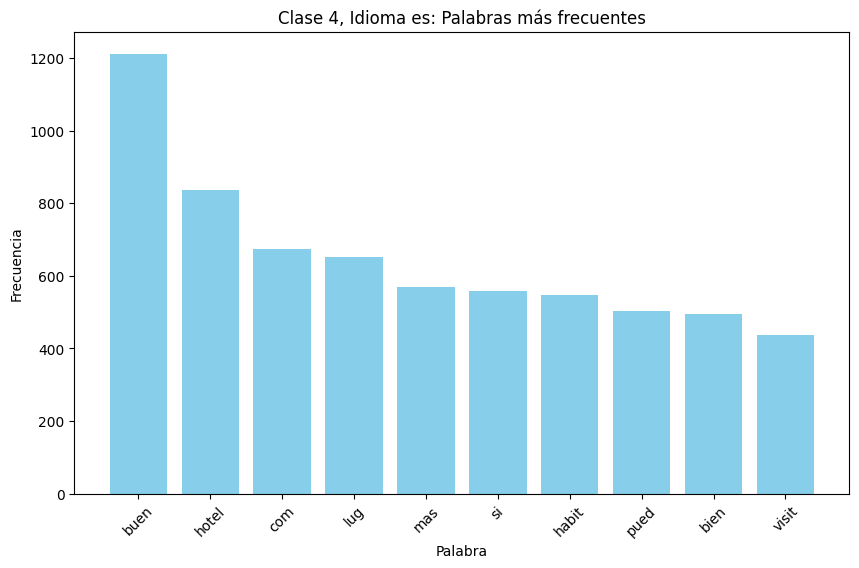

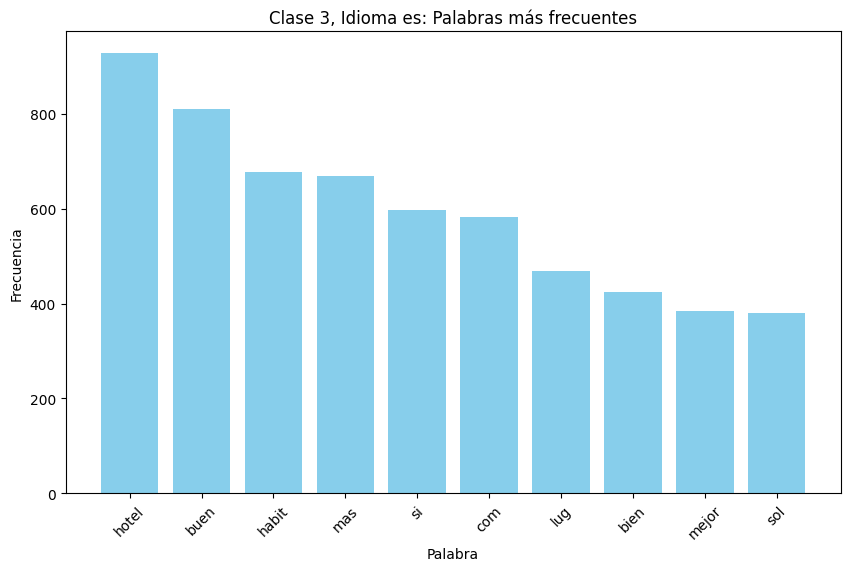

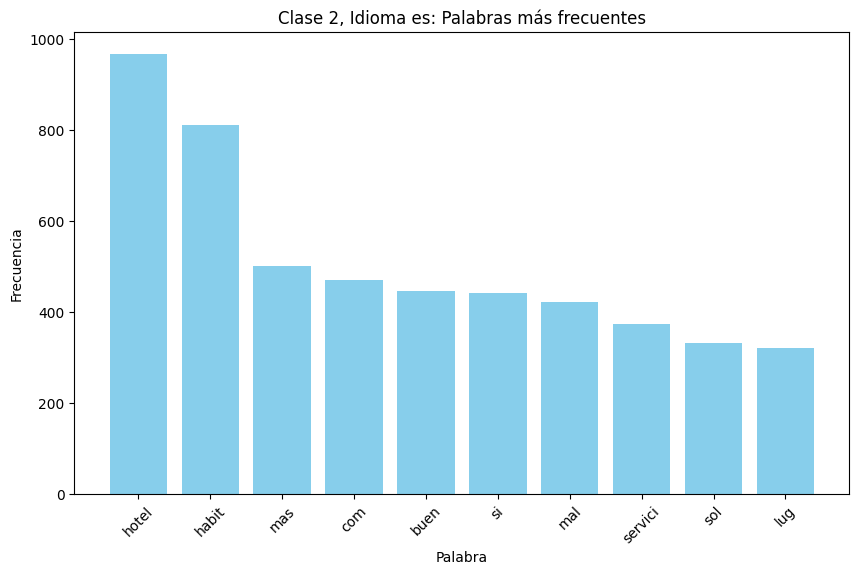

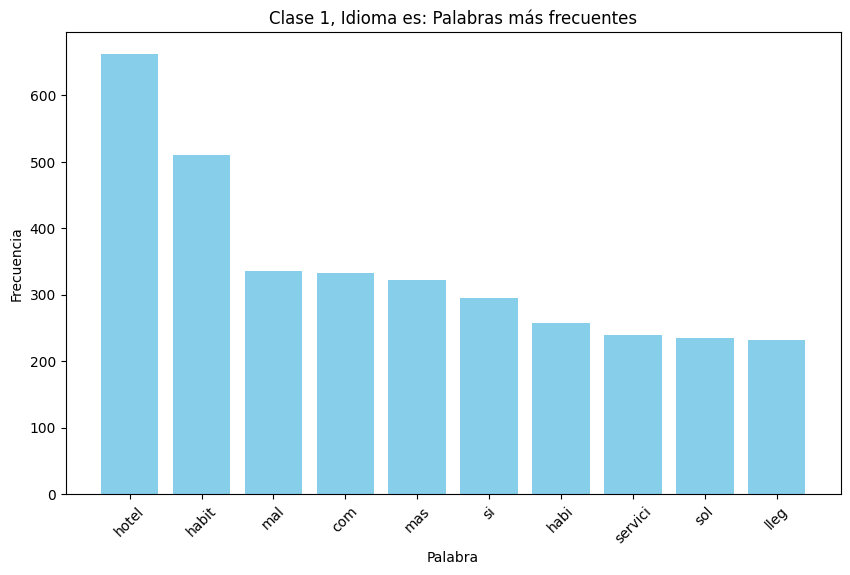

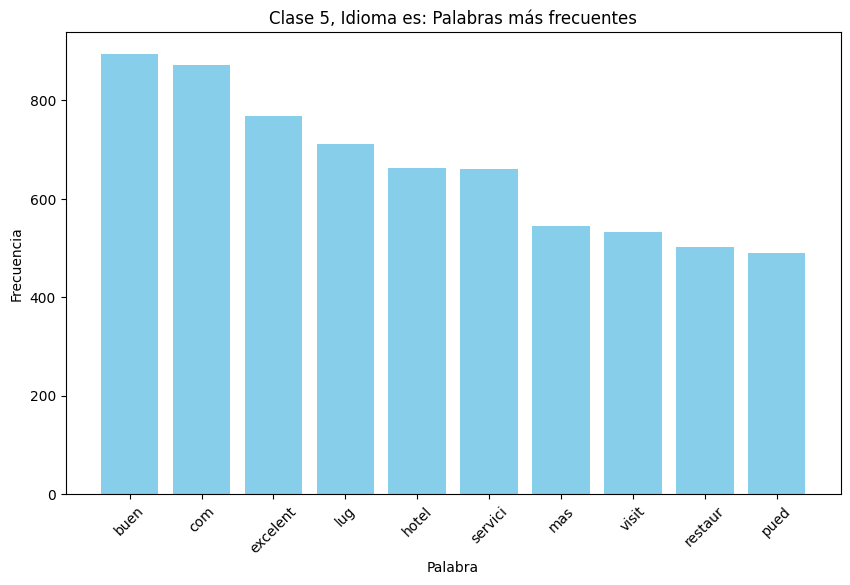

In [ ]:
# Definir el número de palabras principales a mostrar por clase e idioma
top_n_words = 10

# Crear una figura para cada clase e idioma
for class_label in data_t['Class'].unique():
    for language_label in data_t['Idioma'].unique():
        # Filtrar las palabras por clase e idioma
        class_language_words = word_freq_by_class_and_language[(word_freq_by_class_and_language['Class'] == class_label) &
                                                               (word_freq_by_class_and_language['Language'] == language_label)]
        # Seleccionar las N palabras más frecuentes
        top_words = class_language_words.head(top_n_words)

        # Crear el gráfico de barras para las palabras más frecuentes
        plt.figure(figsize=(10, 6))
        plt.bar(top_words['word'], top_words['count'], color='skyblue')
        plt.title(f'Clase {class_label}, Idioma {language_label}: Palabras más frecuentes')
        plt.xlabel('Palabra')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
# Crear un conjunto vacío para almacenar las palabras únicas
unique_words = set()

# Iterar sobre cada combinación de clase e idioma
for class_label in data_t['Class'].unique():
    for language_label in data_t['Idioma'].unique():
        # Filtrar las palabras por clase e idioma
        class_language_words = word_freq_by_class_and_language[(word_freq_by_class_and_language['Class'] == class_label) &
                                                               (word_freq_by_class_and_language['Language'] == language_label)]
        # Seleccionar las N palabras más frecuentes
        top_words = class_language_words.head(top_n_words)

        # Agregar las palabras únicas al conjunto
        unique_words.update(top_words['word'])

# Convertir el conjunto a una lista
unique_words_list = list(unique_words)


In [ ]:
unique_words_list

['mas',
 'si',
 'lug',
 'mal',
 'lleg',
 'habit',
 'pued',
 'sol',
 'mejor',
 'com',
 'visit',
 'servici',
 'excelent',
 'bien',
 'habi',
 'hotel',
 'restaur',
 'buen']

In [ ]:
X_data, y_data = data_t['words_united'], data_t['Class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

#Creación y aplicación del modelo Support Vector Machine

Como este es el modelo con mejores resiultados, vamos a ejecutar el archivo sin labels para generar uno con las predicciones.

In [ ]:
# Definir el pipeline con TF-IDF y SVC
pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(random_state=42))
])


# Definir la cuadrícula de hiperparámetros a explorar
parameters_svc = {
    'tfidf__max_features': [2150, 2200,2250, 2300],
    'clf__C': [3,5,7],  # Parámetro de regularización
    'clf__kernel': ['rbf'],  # Tipo de kernel
}

# Inicializar GridSearchCV con el pipeline y los parámetros definidos
grid_search_svc = GridSearchCV(pipeline_svc, parameters_svc, cv=5, n_jobs=-1, verbose=1)

# Entrenar GridSearchCV con los datos de entrenamiento
grid_search_svc.fit(X_train, y_train)

clasificador_svc = grid_search_svc.best_estimator_
joblib.dump(clasificador_svc, 'modelo_svc_entrenado.pkl')
joblib.dump(clasificador_svc.named_steps['tfidf'], 'vectorizador_tfidf.pkl')

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search_svc.best_params_)

# Evaluar el modelo en datos de prueba
y_pred_svc = grid_search_svc.predict(X_test)
print("\nReporte de clasificación en datos de prueba:")
print(classification_report(y_test, y_pred_svc))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros encontrados:
{'clf__C': 5, 'clf__kernel': 'rbf', 'tfidf__max_features': 2150}

Reporte de clasificación en datos de prueba:
              precision    recall  f1-score   support

           1       0.58      0.45      0.50       173
           2       0.39      0.36      0.37       218
           3       0.39      0.42      0.41       299
           4       0.40      0.41      0.40       392
           5       0.63      0.66      0.65       492

    accuracy                           0.49      1574
   macro avg       0.48      0.46      0.47      1574
weighted avg       0.49      0.49      0.49      1574



In [ ]:
joblib.dump(grid_search_svc, 'pipeline_svc.pkl')

['pipeline_svc.pkl']

dadfa

In [ ]:
X_data2, y_data2 = data_t['Review'], data_t['Class']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.2, random_state=42)